### **NLTK (Natural Language Toolkit)**
#### References
- [https://www.youtube.com/watch?v=XFoehWRzG-I](https://www.youtube.com/watch?v=XFoehWRzG-I)

#### Text Mining Sentiment Analysis
**Text Extraction & Preprocessing**  

Tokenization: Process of removing sensitive data and placing unique symbol of identification in its place to retain all the essential information

In [16]:
tokenization_data = 'Hello! This is sentence'

from nltk.tokenize import sent_tokenize
print(sent_tokenize(tokenization_data))

['Hello!', 'This is sentence']


In [17]:
from nltk.tokenize import word_tokenize
print(word_tokenize(tokenization_data))

['Hello', '!', 'This', 'is', 'sentence']


N-grams: It is a simple language modal that assign probabilities to sequences of words and sentences. N-grams are combinations of adjacent words or letters of length n in the source text

In [23]:
ngrams_data = 'NLTK (Natural Language Toolkit) is a leading platform'

tokens = word_tokenize(ngrams_data)

from nltk.util import ngrams
n_grams = list(ngrams(tokens, 2))

for gram in n_grams:
    print(gram)

('NLTK', '(')
('(', 'Natural')
('Natural', 'Language')
('Language', 'Toolkit')
('Toolkit', ')')
(')', 'is')
('is', 'a')
('a', 'leading')
('leading', 'platform')


Stop Word Removal: are natural language words which have very little meaning, such as "a", "an", "and", "or", "the". These words take up space in the database and increase the processing time. They can be removed by storing a list of stop words.

In [25]:
from nltk.corpus import stopwords

stop_words_data = 'An apple a day keep doctor away'

stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(stop_words_data)

filtered_sentence = [w for w in word_tokens if not w in stop_words]
print(filtered_sentence)

['An', 'apple', 'day', 'keep', 'doctor', 'away']


Stemming: involves reducing a word to stem or base (root) form by removing suffixes. Various stemming algorithms: Porter stemmer, Lancaster  stemmer, Snowball stemmer

In [26]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemming_data = 'importantance of caving  as explained by cavers'

stemming_words = word_tokenize(stemming_data)
for w in stemming_words:
    print(ps.stem(w))

important
of
cave
as
explain
by
caver


Lemmatization: This is the method of grouping the various inflected types of a word so that they can be analyzed as one item. It uses a vocabulary list and morphological analysis (POS of a word) to get the root word

In [29]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize('feet'))
print(lemmatizer.lemmatize('carti'))
print(lemmatizer.lemmatize('geese'))

# Without a POS tag, lemmatizer assumes everything  is a noun
print(lemmatizer.lemmatize('loving'))
print(lemmatizer.lemmatize('loving', 'v')) # with POS tag

foot
carti
goose
loving
love


POS Tagging: Part-Of-Speech tagging marks words in the corpus to a corresponding part of speech tag based on its context and definition
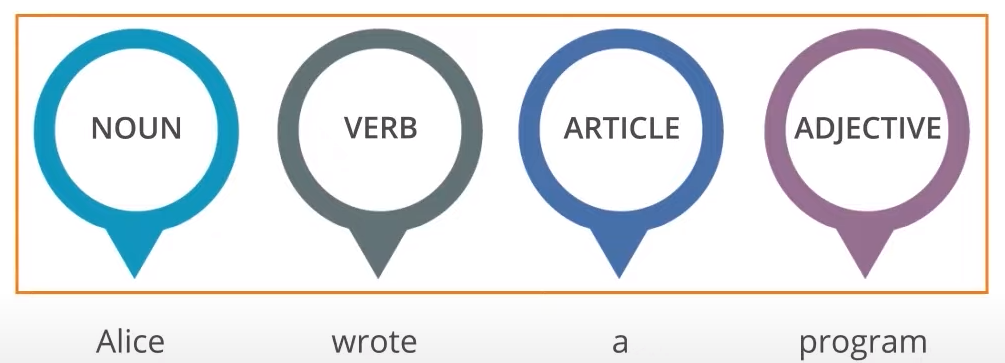

In [30]:
pos_data = '''
    In the vast landscape of human knowledge, Python stands tall as a versatile and powerful language, 
    offering a gateway to endless possibilities. With its simplicity and elegance, Python empowers both novices 
    and experts alike to craft solutions to complex problems with ease. From data science to web development, 
    from artificial intelligence to automation, Python's reach knows no bounds. As we navigate the digital era, Python 
    serves as a beacon of innovation, illuminating pathways to creativity and discovery. So let us embrace Python's charm, 
    for within its syntax lies the key to unlocking a world limited only by our imagination.
'''

from nltk.tag import pos_tag

pos_tokens = sent_tokenize(pos_data)
for i in pos_tokens:
    words_list = word_tokenize(i)
    words_list = [w for w in words_list if not w in stop_words]
    tagged = pos_tag(words_list)

print(tagged)

[('So', 'RB'), ('let', 'VB'), ('us', 'PRP'), ('embrace', 'VB'), ('Python', 'NNP'), ("'s", 'POS'), ('charm', 'NN'), (',', ','), ('within', 'IN'), ('syntax', 'JJ'), ('lies', 'NNS'), ('key', 'VBP'), ('unlocking', 'JJ'), ('world', 'NN'), ('limited', 'VBD'), ('imagination', 'NN'), ('.', '.')]


Named Entity Recognition:

In [6]:
from nltk.corpus import brown
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [8]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [9]:
reviews_words = brown.words(categories='reviews')
reviews_words

['It', 'is', 'not', 'news', 'that', 'Nathan', ...]

In [10]:
len(reviews_words)

40704

Tokenization